In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# EDA

### 1. Initial Data Understanding
- Data Loading and Inspection
- Data Types
- Missing Values
- Duplicates

In [3]:
data = pd.read_csv('../data/raw/car_price_prediction.csv')
data.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


In [4]:
data.shape

(19237, 18)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19237 non-null  int64  
 1   Price             19237 non-null  int64  
 2   Levy              19237 non-null  object 
 3   Manufacturer      19237 non-null  object 
 4   Model             19237 non-null  object 
 5   Prod. year        19237 non-null  int64  
 6   Category          19237 non-null  object 
 7   Leather interior  19237 non-null  object 
 8   Fuel type         19237 non-null  object 
 9   Engine volume     19237 non-null  object 
 10  Mileage           19237 non-null  object 
 11  Cylinders         19237 non-null  float64
 12  Gear box type     19237 non-null  object 
 13  Drive wheels      19237 non-null  object 
 14  Doors             19237 non-null  object 
 15  Wheel             19237 non-null  object 
 16  Color             19237 non-null  object

In [6]:
data.isna().sum()

ID                  0
Price               0
Levy                0
Manufacturer        0
Model               0
Prod. year          0
Category            0
Leather interior    0
Fuel type           0
Engine volume       0
Mileage             0
Cylinders           0
Gear box type       0
Drive wheels        0
Doors               0
Wheel               0
Color               0
Airbags             0
dtype: int64

In [7]:
data.duplicated().sum()

313

In [8]:
data.drop_duplicates(inplace=True)

In [9]:
data.shape

(18924, 18)

### 2. Basic Statistical Overview
- Summary Statistics (`describe()`, `value_counts()`)
- Zero and Constant Values

In [10]:
data.describe()

,ID,Price,Prod. year,Cylinders,Airbags
count,1.892400e+04,1.892400e+04,18924.000000,18924.000000,18924.000000
mean,4.557538e+07,1.858744e+04,2010.914236,4.580216,6.568379
std,9.375468e+05,1.921356e+05,5.665749,1.200223,4.322323
min,2.074688e+07,1.000000e+00,1939.000000,1.000000,0.000000
25%,4.569501e+07,5.331000e+03,2009.000000,4.000000,4.000000
50%,4.577191e+07,1.317200e+04,2012.000000,4.000000,6.000000
75%,4.580174e+07,2.206300e+04,2015.000000,4.000000,12.000000
max,4.581665e+07,2.630750e+07,2020.000000,16.000000,16.000000


In [11]:
data.select_dtypes(include='object').describe()

,Levy,Manufacturer,Model,Category,Leather interior,Fuel type,Engine volume,Mileage,Gear box type,Drive wheels,Doors,Wheel,Color
count,18924,18924,18924,18924,18924,18924,18924,18924,18924,18924,18924,18924,18924
unique,559,65,1590,11,2,7,107,7687,4,3,3,2,16
top,-,HYUNDAI,Prius,Sedan,Yes,Petrol,2,0 km,Automatic,Front,04-May,Left wheel,Black
freq,5709,3729,1069,8600,13731,9944,3856,714,13282,12695,18032,17471,4944


In [12]:
data['Manufacturer'].unique()

array(['LEXUS', 'CHEVROLET', 'HONDA', 'FORD', 'HYUNDAI', 'TOYOTA',
       'MERCEDES-BENZ', 'OPEL', 'PORSCHE', 'BMW', 'JEEP', 'VOLKSWAGEN',
       'AUDI', 'RENAULT', 'NISSAN', 'SUBARU', 'DAEWOO', 'KIA',
       'MITSUBISHI', 'SSANGYONG', 'MAZDA', 'GMC', 'FIAT', 'INFINITI',
       'ALFA ROMEO', 'SUZUKI', 'ACURA', 'LINCOLN', 'VAZ', 'GAZ',
       'CITROEN', 'LAND ROVER', 'MINI', 'DODGE', 'CHRYSLER', 'JAGUAR',
       'ISUZU', 'SKODA', 'DAIHATSU', 'BUICK', 'TESLA', 'CADILLAC',
       'PEUGEOT', 'BENTLEY', 'VOLVO', 'სხვა', 'HAVAL', 'HUMMER', 'SCION',
       'UAZ', 'MERCURY', 'ZAZ', 'ROVER', 'SEAT', 'LANCIA', 'MOSKVICH',
       'MASERATI', 'FERRARI', 'SAAB', 'LAMBORGHINI', 'ROLLS-ROYCE',
       'PONTIAC', 'SATURN', 'ASTON MARTIN', 'GREATWALL'], dtype=object)

In [17]:
def top_and_bottom_combined(df, col, n=5):
    top_counts = df[col].value_counts().head(n)
    bottom_counts = df[col].value_counts().tail(n)
    
    combined = pd.concat([top_counts, bottom_counts], axis=0)
    return combined

for col in data.select_dtypes(include='object'):
    print(f'{col} value counts:')
    print(top_and_bottom_combined(data, col))
    print('30 Unique values:', data[col].unique()[:30])
    print('-------------------')

Levy value counts:
-       5709
765      482
891      453
639      403
640      398
3156       1
2908       1
1279       1
1719       1
1901       1
Name: Levy, dtype: int64
30 Unique values: ['1399' '1018' '-' '862' '446' '891' '761' '751' '394' '1053' '1055'
 '1079' '810' '2386' '1850' '531' '586' '1249' '2455' '583' '1537' '1288'
 '915' '1750' '707' '1077' '1486' '1091' '650' '382']
-------------------
Manufacturer value counts:
HYUNDAI          3729
TOYOTA           3606
MERCEDES-BENZ    2043
FORD             1088
CHEVROLET        1047
TESLA               1
PONTIAC             1
SATURN              1
ASTON MARTIN        1
GREATWALL           1
Name: Manufacturer, dtype: int64
30 Unique values: ['LEXUS' 'CHEVROLET' 'HONDA' 'FORD' 'HYUNDAI' 'TOYOTA' 'MERCEDES-BENZ'
 'OPEL' 'PORSCHE' 'BMW' 'JEEP' 'VOLKSWAGEN' 'AUDI' 'RENAULT' 'NISSAN'
 'SUBARU' 'DAEWOO' 'KIA' 'MITSUBISHI' 'SSANGYONG' 'MAZDA' 'GMC' 'FIAT'
 'INFINITI' 'ALFA ROMEO' 'SUZUKI' 'ACURA' 'LINCOLN' 'VAZ' 'GAZ']
----------------

In [18]:
# Fix the problems
# Replace Levy - with 0 and column type
data['Levy'].replace({'-': 0}, inplace=True)
data['Levy'] = pd.to_numeric(data['Levy'])

In [19]:
data['Engine volume'] = data['Engine volume'].str.replace('Turbo', '')
data['Engine volume'] = pd.to_numeric(data['Engine volume'])

In [20]:
data['Mileage'] = data['Mileage'].str.replace('km', '')
data['Mileage'] = pd.to_numeric(data['Mileage'])

In [21]:
data.drop(['Doors'], axis=1, inplace=True)

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18924 entries, 0 to 19236
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                18924 non-null  int64  
 1   Price             18924 non-null  int64  
 2   Levy              18924 non-null  int64  
 3   Manufacturer      18924 non-null  object 
 4   Model             18924 non-null  object 
 5   Prod. year        18924 non-null  int64  
 6   Category          18924 non-null  object 
 7   Leather interior  18924 non-null  object 
 8   Fuel type         18924 non-null  object 
 9   Engine volume     18924 non-null  float64
 10  Mileage           18924 non-null  int64  
 11  Cylinders         18924 non-null  float64
 12  Gear box type     18924 non-null  object 
 13  Drive wheels      18924 non-null  object 
 14  Wheel             18924 non-null  object 
 15  Color             18924 non-null  object 
 16  Airbags           18924 non-null  int64 

### 3. Distribution of Variables
- Numerical Features (histograms, KDE)
- Categorical Features (bar plots, check imbalancement)
- Outlier detection

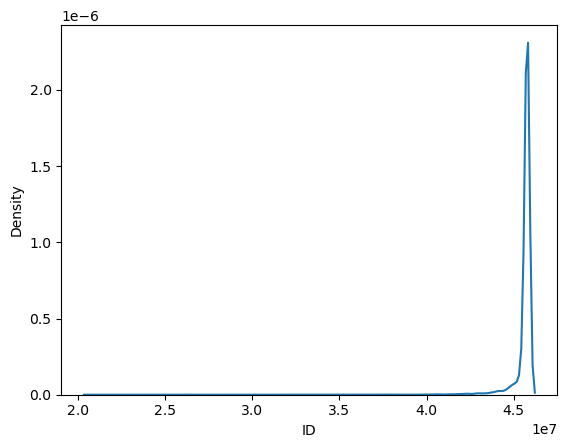

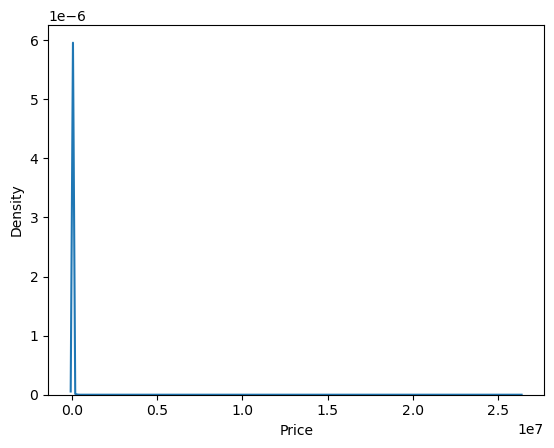

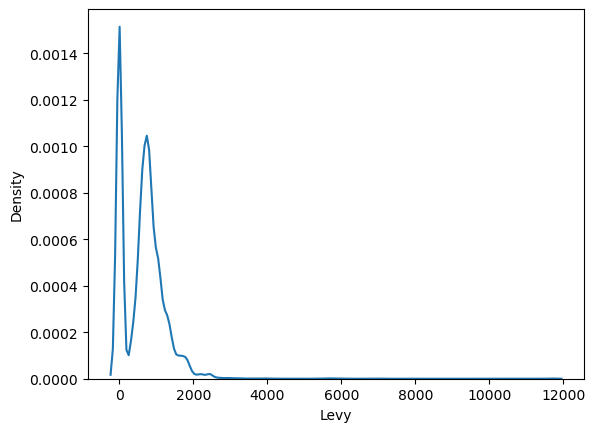

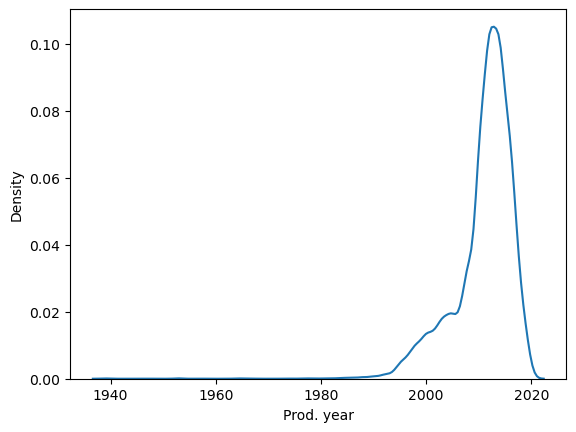

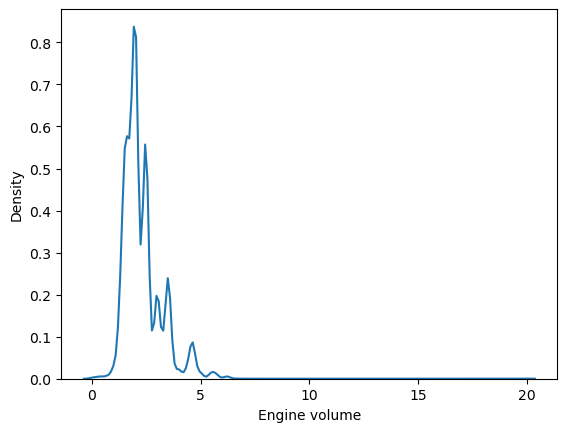

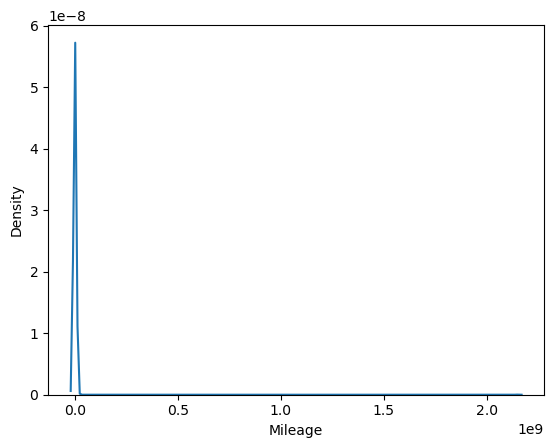

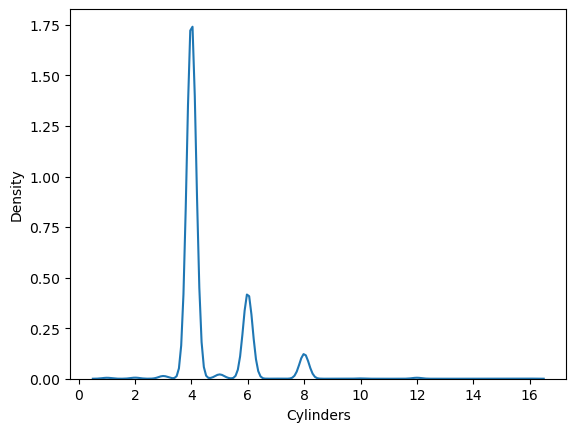

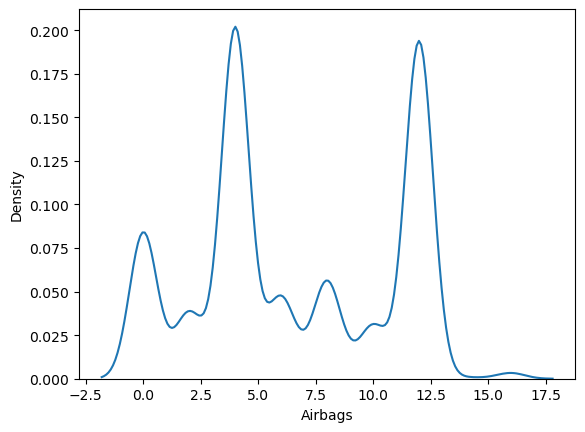

In [23]:
for col in data.select_dtypes('number').columns:
    sns.kdeplot(data[col])
    plt.show()

c:\ProgramData\Anaconda3\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


<AxesSubplot:xlabel='Mileage', ylabel='Density'>

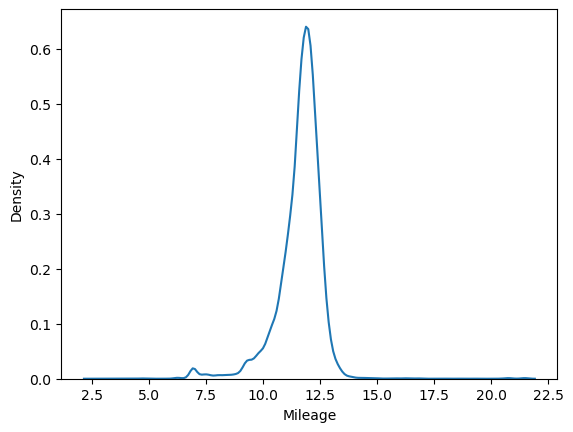

In [24]:
sns.kdeplot(np.log(data['Mileage']))

### 4. Correlations
- Numerical Correlations (`corr()`)
- Categorical Correlations

C:\Users\Dell\AppData\Local\Temp\ipykernel_12040\1119197534.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True)


<AxesSubplot:>

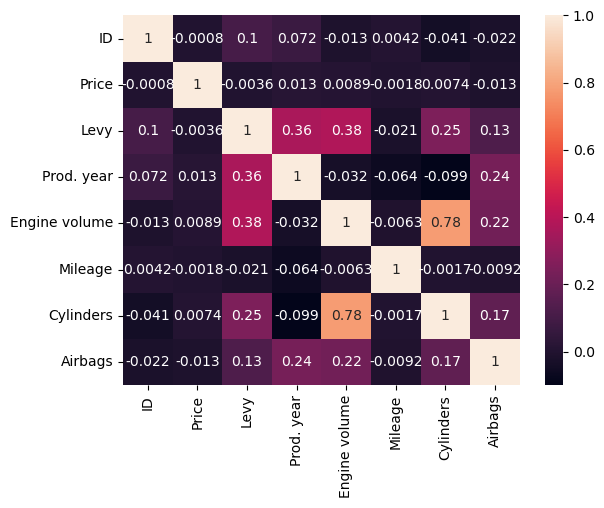

In [25]:
sns.heatmap(data.corr(), annot=True)

### 5. Feature Interactions
- Scatter Plots

In [ ]:
sns.pairplot(data[:100])

KeyboardInterrupt: 

<AxesSubplot:ylabel='Price'>

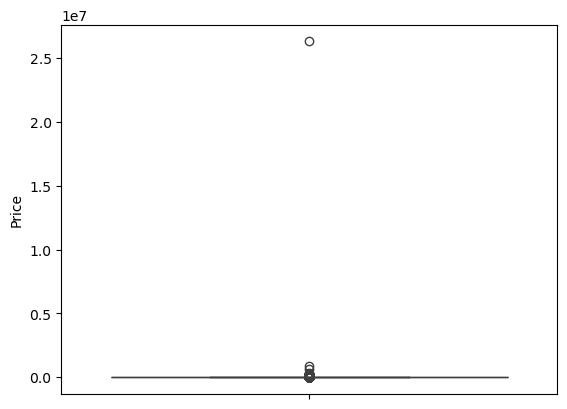

In [21]:
sns.boxplot(data['Price'])

In [22]:
data[data['Price'] > 5e5]

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Wheel,Color,Airbags
1225,45795524,627220,0,MERCEDES-BENZ,G 65 AMG 63AMG,2020,Jeep,Yes,Petrol,6.3,0,8.0,Tiptronic,4x4,Left wheel,Black,12
8541,45761204,872946,2067,LAMBORGHINI,Urus,2019,Universal,Yes,Petrol,4.0,2531,8.0,Tiptronic,4x4,Left wheel,Black,0
16983,45812886,26307500,0,OPEL,Combo,1999,Goods wagon,No,Diesel,1.7,99999,4.0,Manual,Front,Left wheel,Blue,0


<AxesSubplot:ylabel='Levy'>

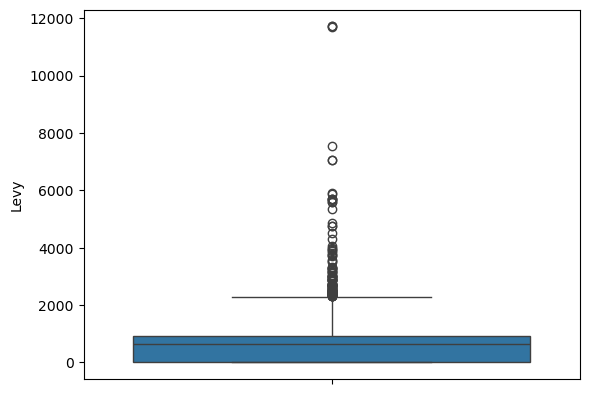

In [23]:
sns.boxplot(data['Levy'])

<AxesSubplot:ylabel='Mileage'>

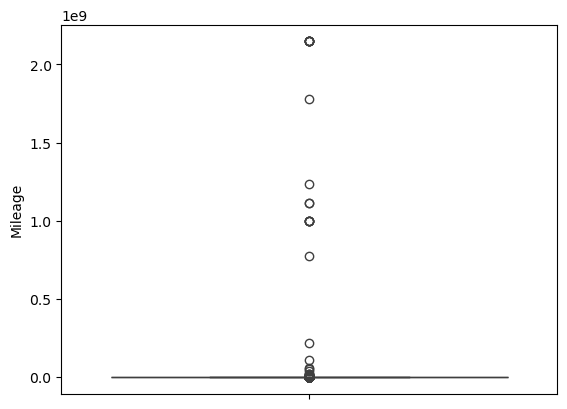

In [24]:
sns.boxplot(data['Mileage'])

In [25]:
def clean_outliers(df, col):
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    
    df_no_outliers = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df_no_outliers


In [26]:
data = clean_outliers(data, 'Price')
data = clean_outliers(data, 'Mileage')
data = clean_outliers(data, 'Levy')

In [27]:
data.shape

(17084, 17)

### 6. Target Variable Analysis
- Distribution of Target Variable (for class imbalance, decide if resampling or weighting is needed)
- Relationship with Predictors (scatter plots, box plots against the target)

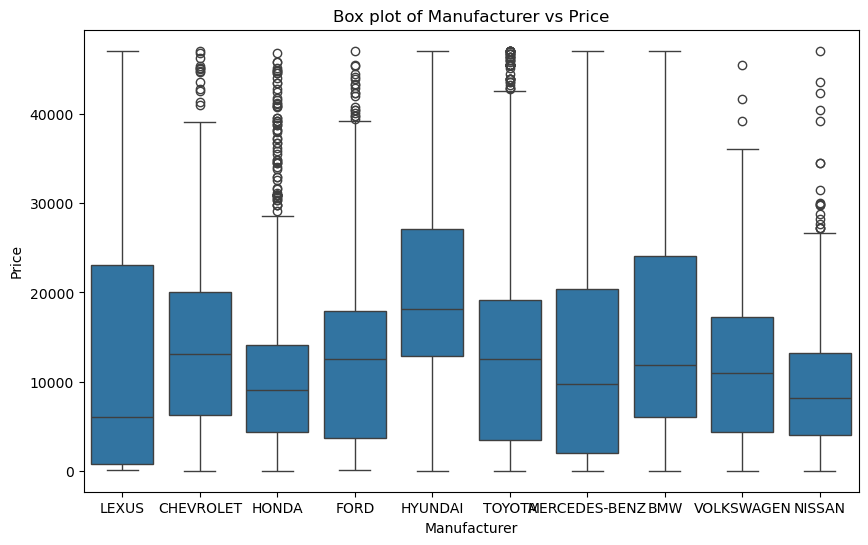

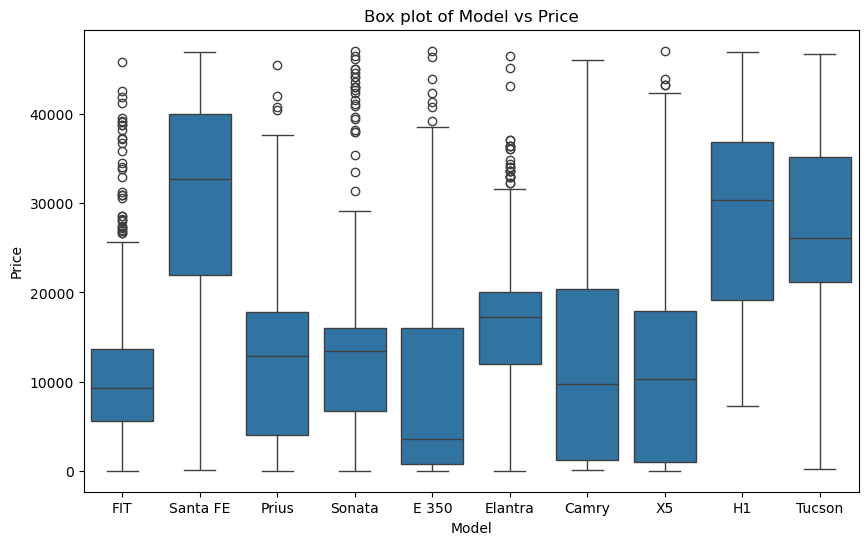

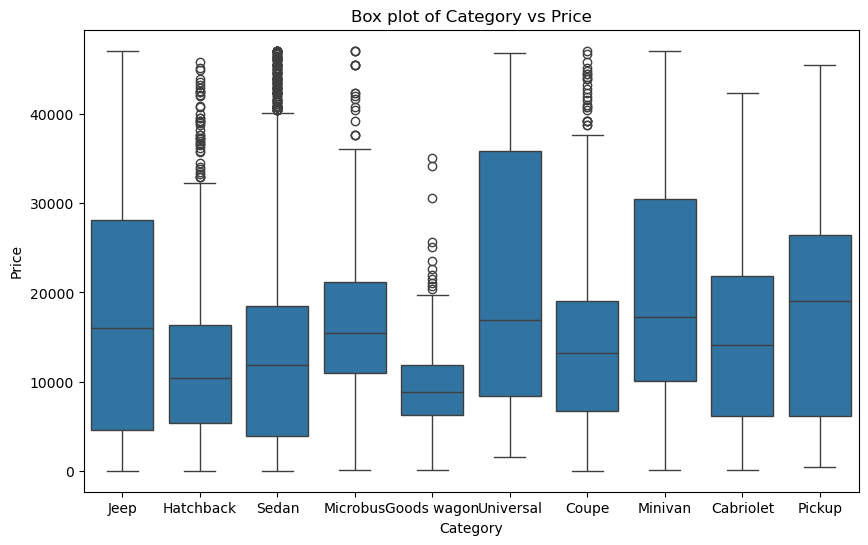

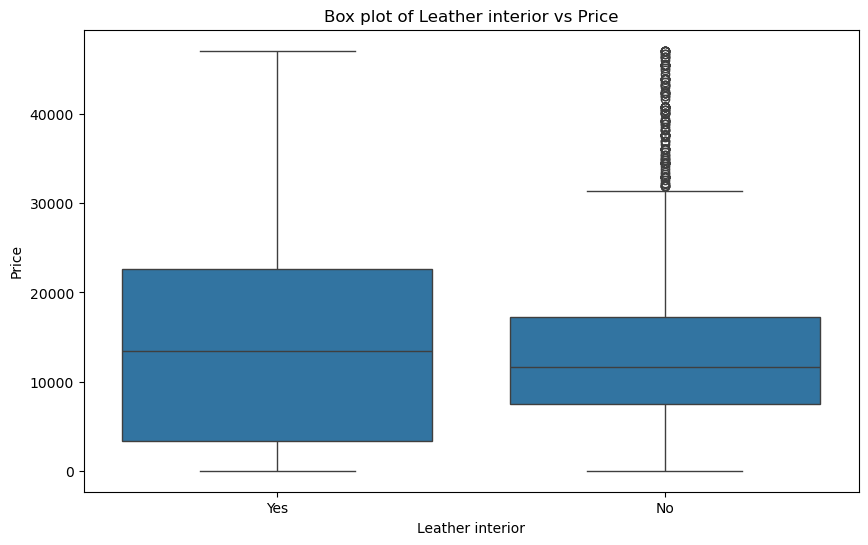

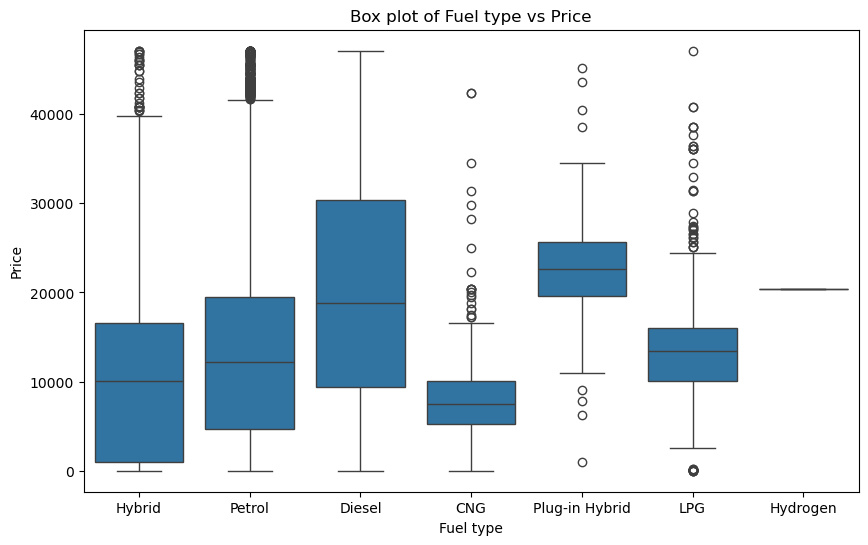

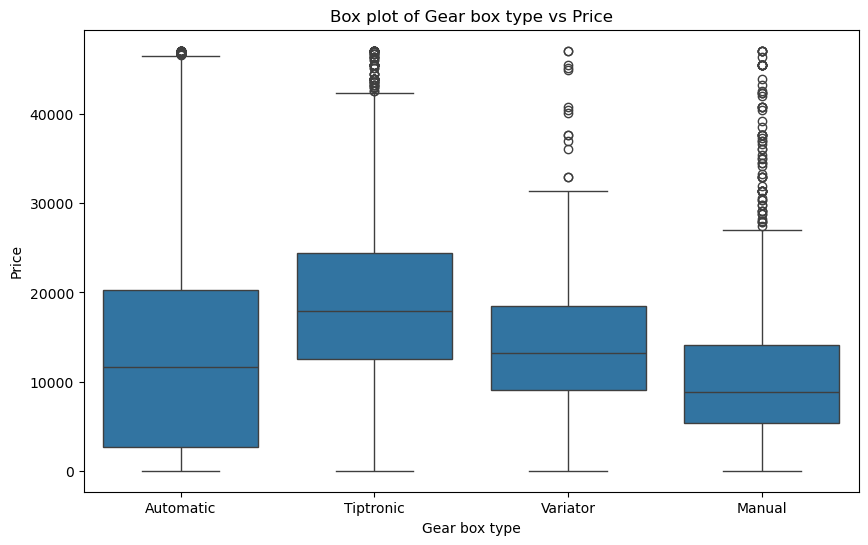

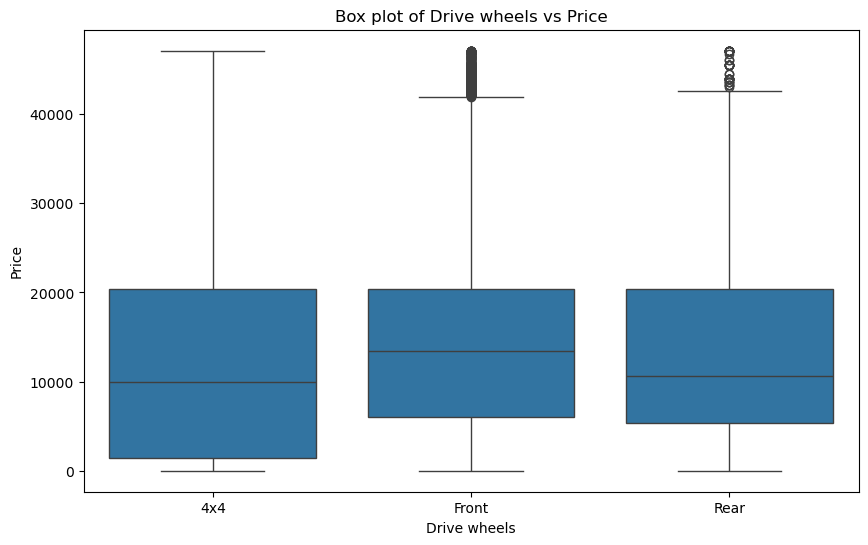

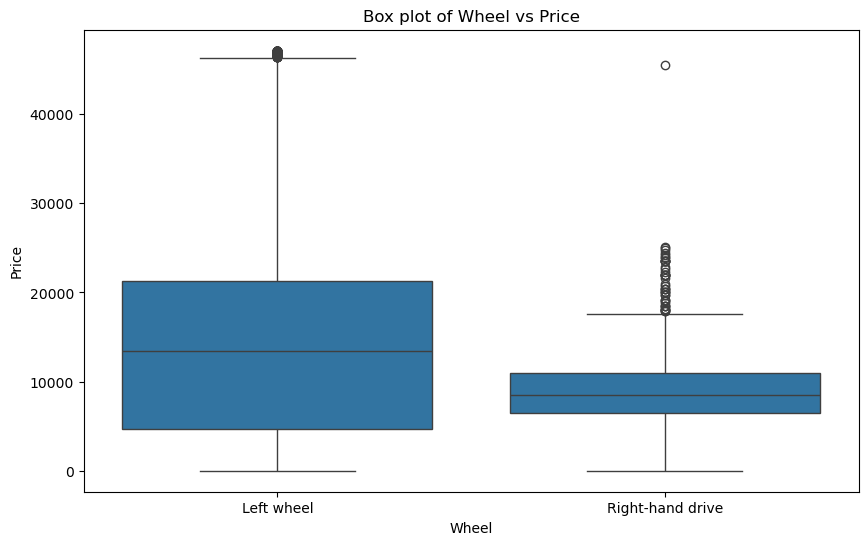

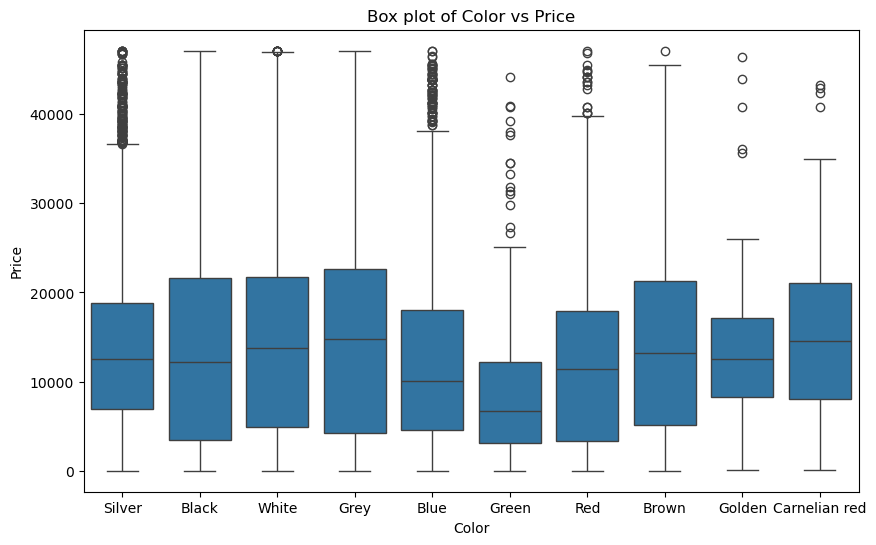

In [28]:
for col in data.select_dtypes('object'):
    top_categories = data[col].value_counts().index[:10]
    filtered_df = data[data[col].isin(top_categories)]
    
    plt.figure(figsize=(10,6))
    sns.boxplot(x=filtered_df[col], y=filtered_df['Price'])
    plt.title(f'Box plot of {col} vs Price')
    

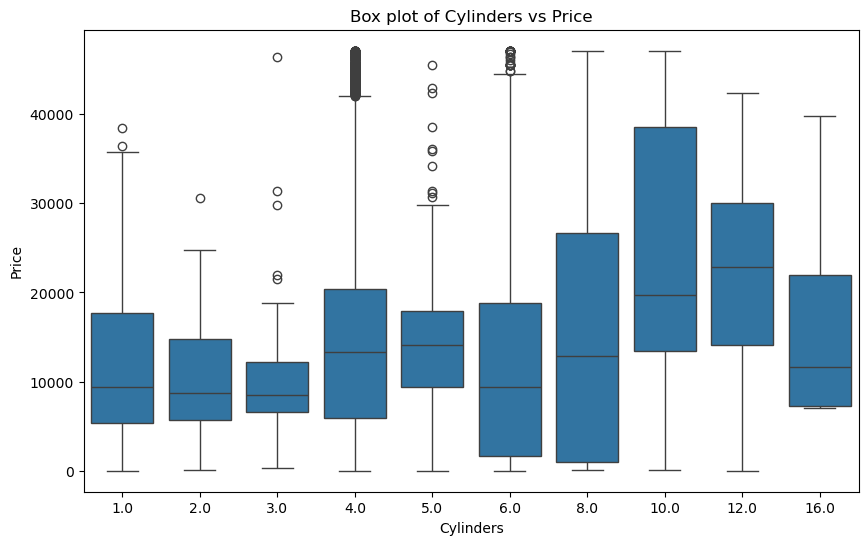

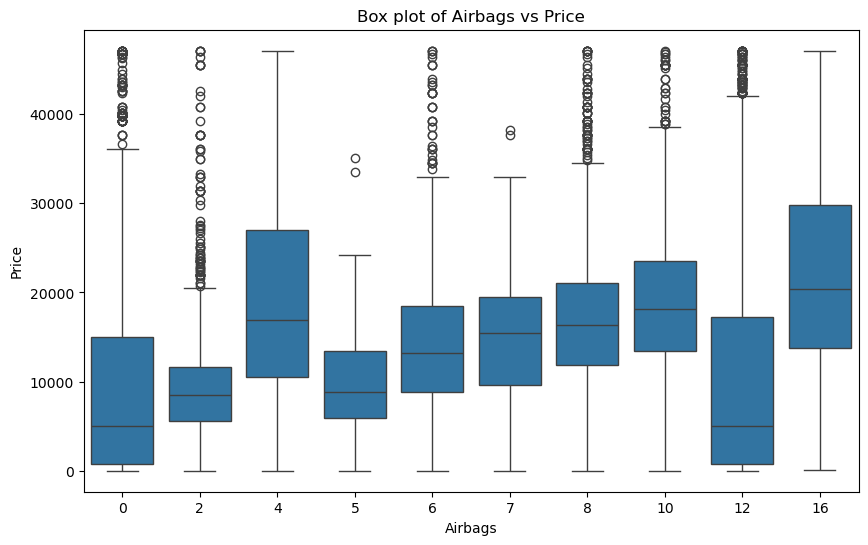

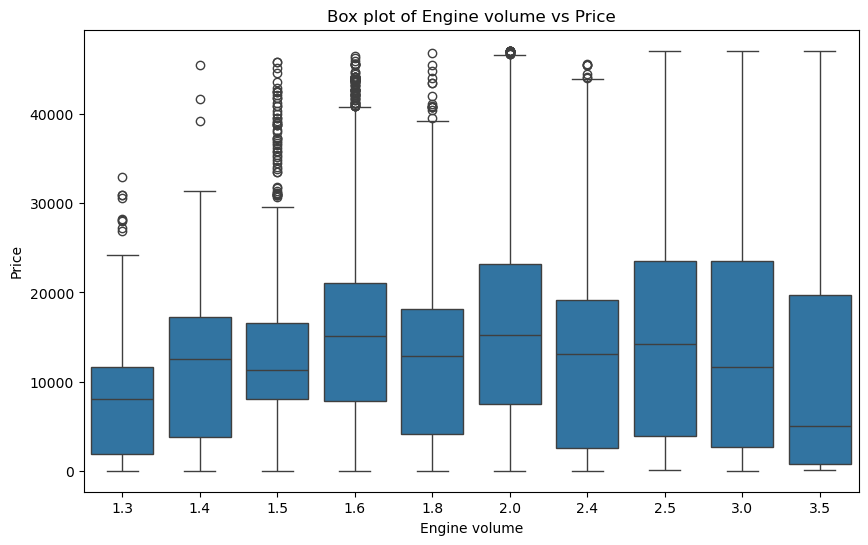

In [29]:
for col in ['Cylinders', 'Airbags', 'Engine volume']:
    top_categories = data[col].value_counts().index[:10]
    filtered_df = data[data[col].isin(top_categories)]
    
    plt.figure(figsize=(10,6))
    sns.boxplot(x=filtered_df[col], y=filtered_df['Price'])
    plt.title(f'Box plot of {col} vs Price')
    

# Other notes:
- Can do target encoding (mean encoding) for `Model`, `Category`, `Manufacturer` and `Fuel Type`.